<a href="https://colab.research.google.com/github/Saks55/Octanet_August/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NetFlix Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from google.colab import files
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [21]:
df = pd.read_csv('airline_passengers.csv')
df


,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [22]:
df.isnull().sum()


,0
Month,0
Thousands of Passengers,0


In [23]:
#check data type
df.dtypes


,0
Month,object
Thousands of Passengers,int64


In [26]:
df['Month'] = pd.to_datetime(df['Month'])

In [27]:
df.fillna(method='ffill', inplace=True)  # Forward fill


/tmp/ipython-input-27-1443003122.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [28]:
df.dropna(inplace=True)


In [29]:
df.columns = ['Month', 'Passengers']  # Rename columns if needed


In [30]:
df.duplicated().sum()


np.int64(0)

In [31]:
df.drop_duplicates(inplace=True)


In [32]:
df.describe()


,Month,Passengers
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


In [33]:
df.to_csv('cleaned_airline_passengers.csv', index=False)


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Convert Month column to datetime if not already
df['Month'] = pd.to_datetime(df['Month'])

In [36]:

# Set Month as index for time series plotting
df.set_index('Month', inplace=True)

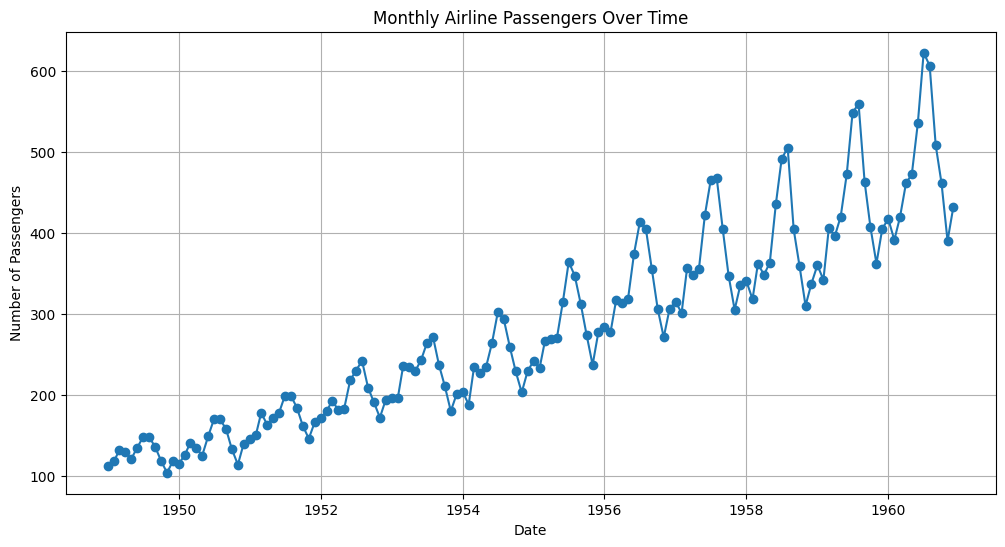

In [37]:
# Plot 1: Time Series Line Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], marker='o')
plt.title('Monthly Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

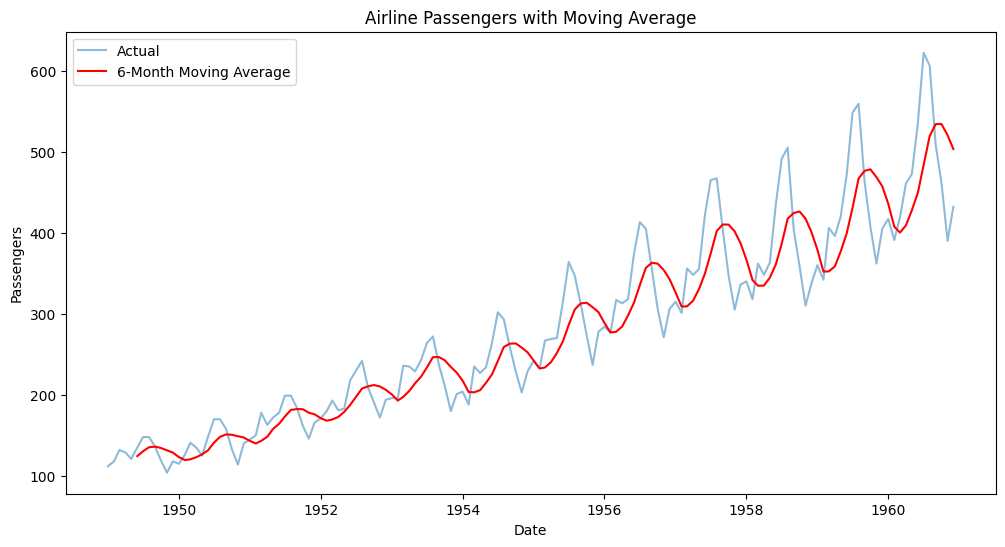

In [39]:

# Plot 2: Moving Average (6-month window)
df['Moving_Avg'] = df['Passengers'].rolling(window=6).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Actual', alpha=0.5)
plt.plot(df.index, df['Moving_Avg'], label='6-Month Moving Average', color='red')
plt.title('Airline Passengers with Moving Average')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

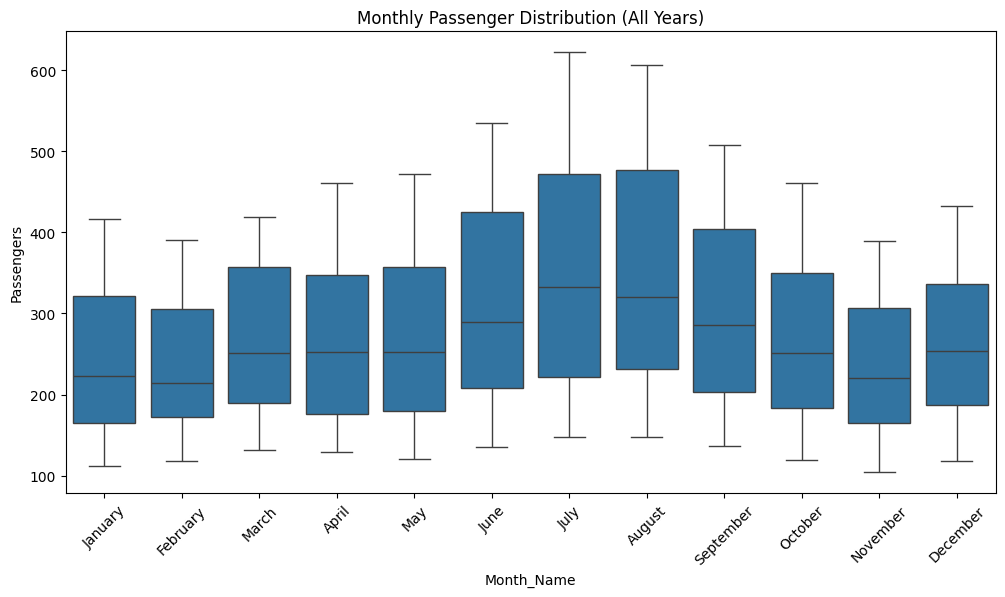

In [40]:
# Plot 3: Month-wise Trend (across all years)
df['Month_Name'] = df.index.month_name()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month_Name', y='Passengers', data=df, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title('Monthly Passenger Distribution (All Years)')
plt.xticks(rotation=45)
plt.show()

# Task
Analyze and visualize the "airline_passenger.csv" dataset, including data cleaning, time series decomposition, correlation analysis, and additional visualizations. Provide step-by-step code and a summary of findings.

## Time series decomposition

### Subtask:
Decompose the time series into trend, seasonality, and residuals to understand the underlying patterns.


**Reasoning**:
Decompose the time series and plot the decomposed components.



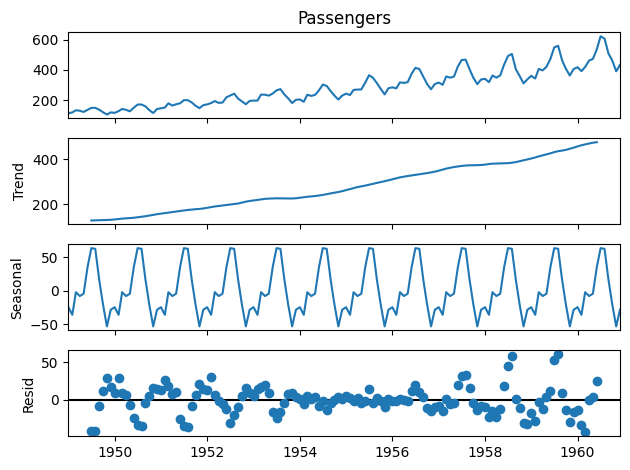

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)
decomposition.plot()
plt.show()

## Correlation analysis

### Subtask:
Analyze the correlation between months or years to identify seasonal patterns.


**Reasoning**:
Reset the index, extract year and month, create a pivot table, calculate the correlation matrix, and visualize it using a heatmap to analyze seasonal patterns.



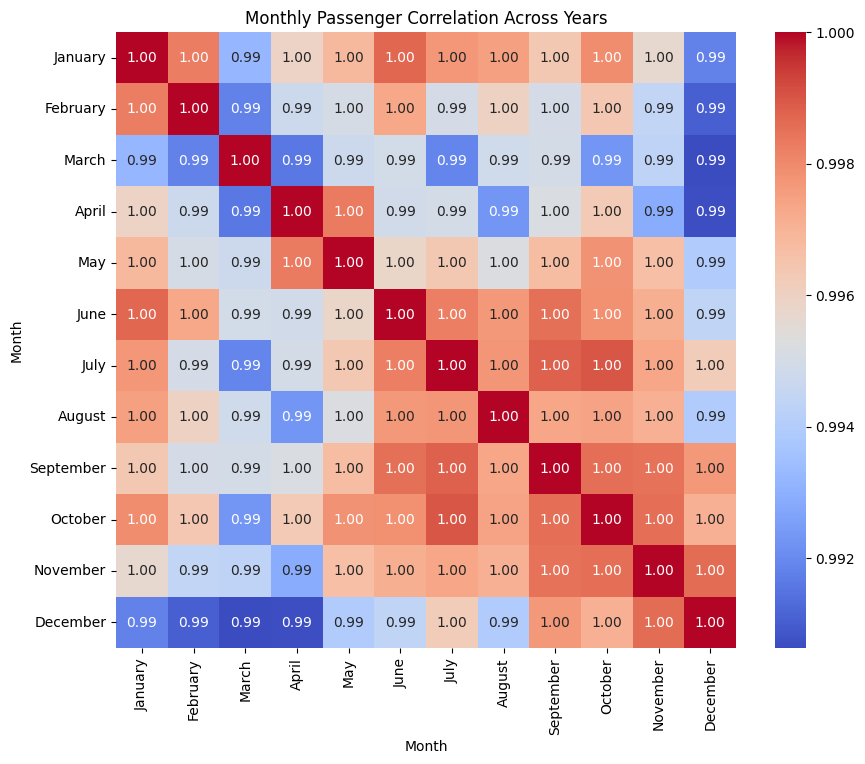

In [43]:
df_reset = df.reset_index()
df_reset['Year'] = df_reset['Month'].dt.year
df_reset['Month'] = df_reset['Month'].dt.month_name()

pivot_table = df_reset.pivot_table(index='Year', columns='Month', values='Passengers')

# Reorder columns by month name
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[month_order]

correlation_matrix = pivot_table.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Monthly Passenger Correlation Across Years')
plt.show()

## Time series decomposition

### Subtask:
Decompose the time series into trend, seasonality, and residuals to understand the underlying patterns.

**Reasoning**:
Decompose the time series and plot the decomposed components.

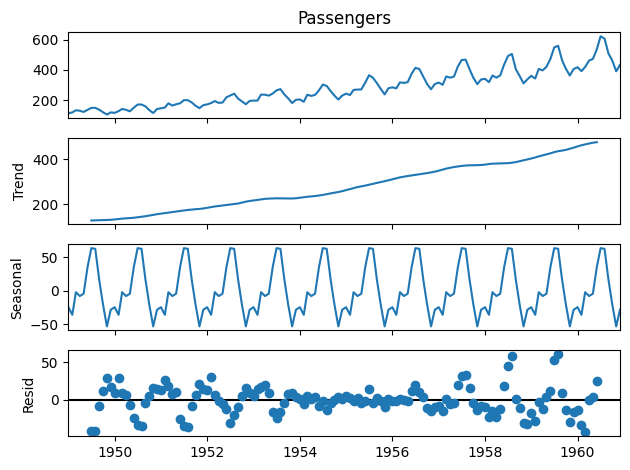

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)
decomposition.plot()
plt.show()

## Correlation analysis

### Subtask:
Analyze the correlation between months or years to identify seasonal patterns.

**Reasoning**:
Reset the index, extract year and month, create a pivot table, calculate the correlation matrix, and visualize it using a heatmap to analyze seasonal patterns.

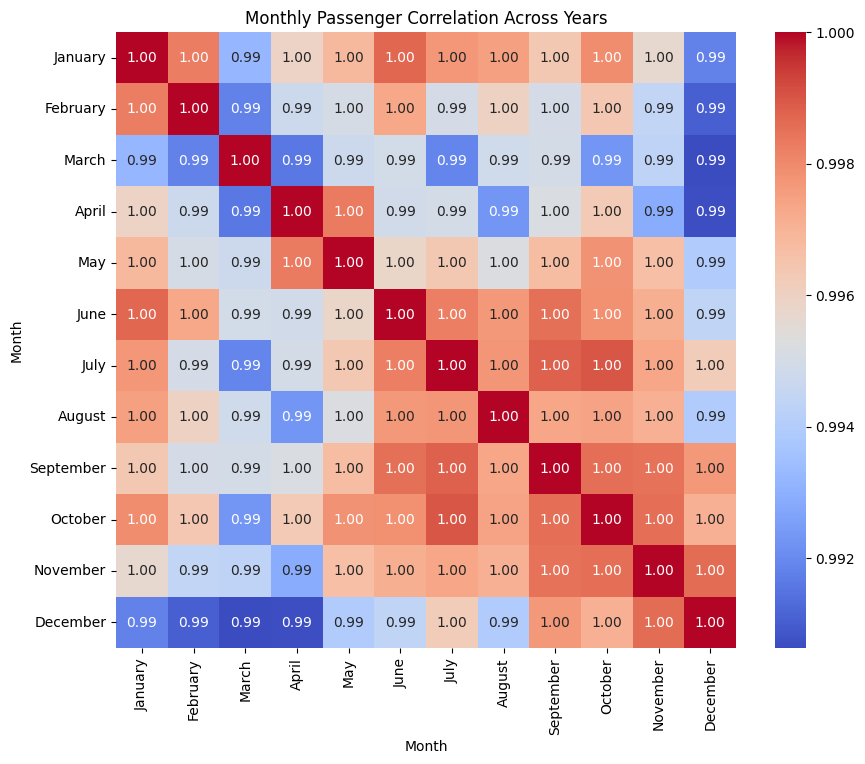

In [45]:
df_reset = df.reset_index()
df_reset['Year'] = df_reset['Month'].dt.year
df_reset['Month'] = df_reset['Month'].dt.month_name()

pivot_table = df_reset.pivot_table(index='Year', columns='Month', values='Passengers')

# Reorder columns by month name
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[month_order]

correlation_matrix = pivot_table.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Monthly Passenger Correlation Across Years')
plt.show()

## Forecasting (Optional)

### Subtask:
Apply a forecasting model to predict future passenger numbers.

**Reasoning**:
Use the ARIMA model to forecast future values. This involves installing the necessary library, fitting the model, and making predictions.

In [ ]:
!pip install pmdarima

In [46]:
from pmdarima import auto_arima

# Fit ARIMA model
model = auto_arima(df['Passengers'], seasonal=True, m=12, stepwise=True, suppress_warnings=True, error_action='ignore')

# Make predictions
n_periods = 24  # Forecast for the next 24 months
forecast = model.predict(n_periods=n_periods)

# Create a date index for the forecast
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_periods + 1, freq='MS')[1:]

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Passengers'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Actual Passengers')
plt.plot(forecast_df.index, forecast_df['Forecasted Passengers'], color='red', label='Forecasted Passengers')
plt.title('Airline Passenger Forecasting (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'pmdarima'

In [47]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.7 MB/s eta 0:00:00


In [49]:

# Fit ARIMA model
from pmdarima import auto_arima
model = auto_arima(df['Passengers'], seasonal=True, m=12, stepwise=True, suppress_warnings=True, error_action='ignore')

# Make predictions
n_periods = 24  # Forecast for the next 24 months
forecast = model.predict(n_periods=n_periods)

# Create a date index for the forecast
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_periods + 1, freq='MS')[1:]

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Passengers'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Actual Passengers')
plt.plot(forecast_df.index, forecast_df['Forecasted Passengers'], color='red', label='Forecasted Passengers')
plt.title('Airline Passenger Forecasting (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject